In [1]:
import sys
from pathlib import Path

# 🔹 반드시 import 전에 sys.path 조정
root_path = Path().resolve().parent.parent
if str(root_path) not in sys.path:
    sys.path.insert(0, str(root_path))

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from src.outliers.z_score import compute_zscore_scipy
from src.outliers.z_score import remove_outliers_zscore

# 점 그래프
def create_zscore_plot(data):
    z_scores = compute_zscore_scipy(data)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(data, label="Original Data", marker='o')
    ax.plot(z_scores, label="Z-score", marker='x')
    ax.set_title("Data vs Z-score")
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)
    return fig, ax

# 추세선 
def plot_with_trendline(data):
    x = np.arange(len(data))
    y = np.array(data)

    # 1차 다항식(직선)으로 회귀선 구하기
    coeffs = np.polyfit(x, y, 1)
    trendline = np.polyval(coeffs, x)

    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label="Data", marker='o')
    plt.plot(x, trendline, label="Trend Line", color='red')
    plt.legend()
    plt.grid(True)
    plt.show()


# CSV에서 데이터 가져오기
file_path = r'D:\dev\modules\pt_eh_inflow_data.csv'
df = pd.read_csv(file_path)
inflow_flux_tot_data = df['inflow_flux_tot']



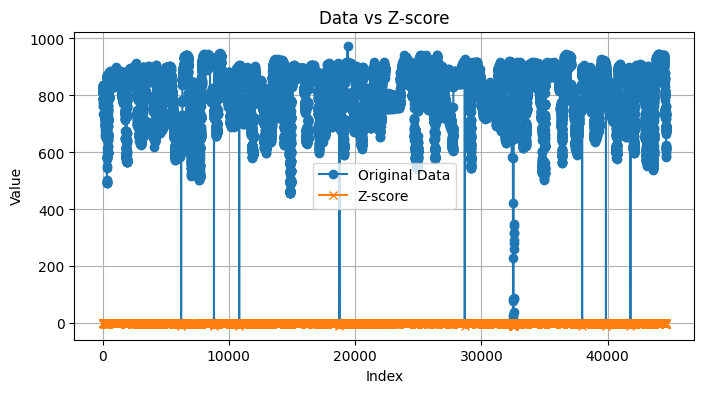

In [2]:
# 시각화
fig, ax = create_zscore_plot(inflow_flux_tot_data)
plt.show()


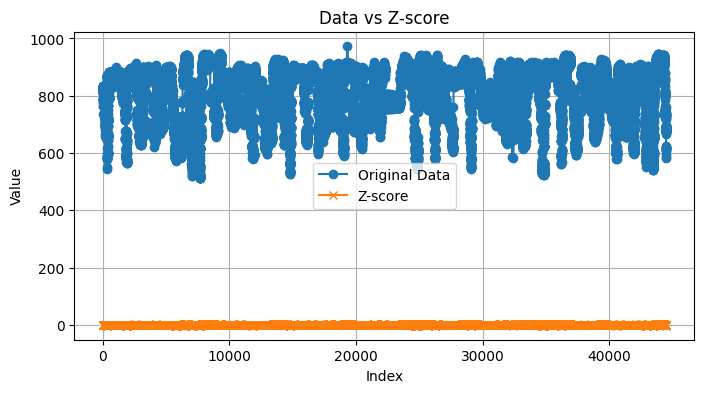

In [3]:
# 이상치 제거
filtered_data = remove_outliers_zscore(inflow_flux_tot_data)
fig, ax = create_zscore_plot(filtered_data)
plt.show()


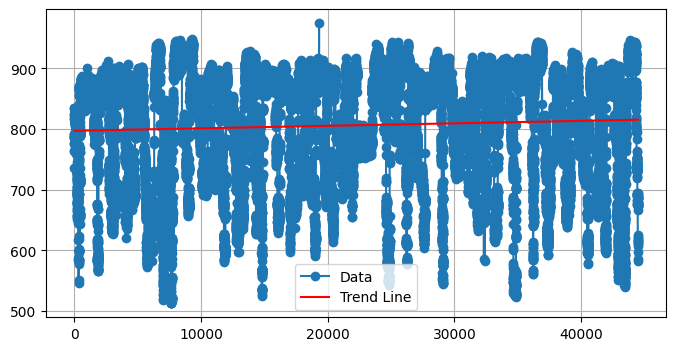

In [4]:
plot_with_trendline(filtered_data)

In [ ]:
data = pd.Series(filtered_data)
moving_avg = data.rolling(window=3).mean()